In [1]:
from sklearn import tree

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
clf_tree = tree.DecisionTreeClassifier(random_state=42)

In [4]:
x=iris.data
y = iris.target

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
data_fr = pd.read_csv('iris.data',header=-1)
data_fr.columns = ['s_len' , 's_wid' ,'p_len', 'p_wid','class']

In [23]:
x = data_fr[['p_len','p_wid']]

In [24]:
data_fr['tmp'] = data_fr['class'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = data_fr['tmp']

In [25]:
clf_tree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [26]:
xv = x.values.reshape(-1,1)
h = 0.02
x_min, x_max = xv.min(), xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

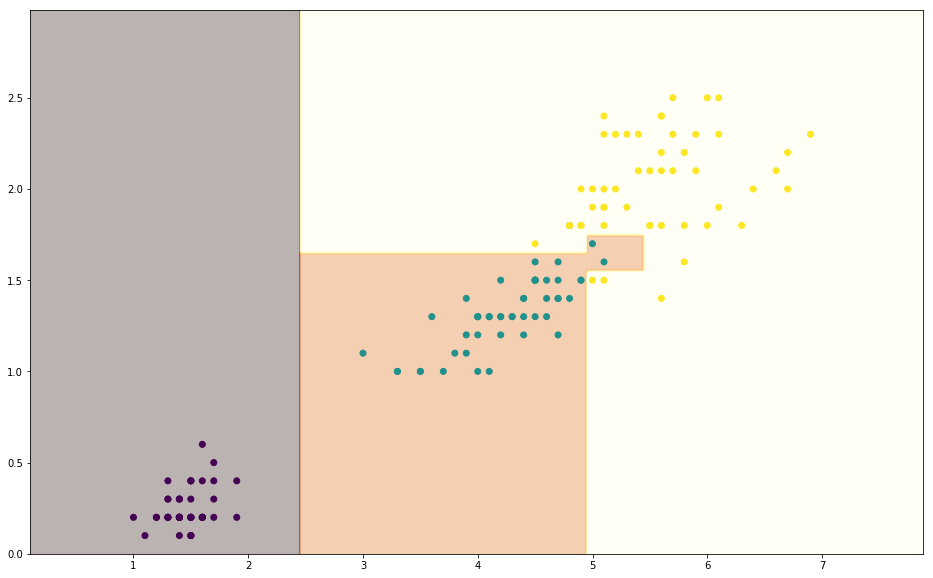

In [27]:
z = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(x.values[:, 0], x.values[:, 1], c=y);

In [13]:
import graphviz

In [14]:
dot_data = tree.export_graphviz(clf_tree,out_file=None,feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)

In [17]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="petal length (cm) <= 2.45\\ngini = 0.667\\nsamples = 150\\nvalue = [50, 50, 50]\\nclass = setosa", fillcolor="#e5813900"] ;\n1 [label="gini = 0.0\\nsamples = 50\\nvalue = [50, 0, 0]\\nclass = setosa", fillcolor="#e58139ff"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.75\\ngini = 0.5\\nsamples = 100\\nvalue = [0, 50, 50]\\nclass = versicolor", fillcolor="#39e58100"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 4.95\\ngini = 0.168\\nsamples = 54\\nvalue = [0, 49, 5]\\nclass = versicolor", fillcolor="#39e581e5"] ;\n2 -> 3 ;\n4 [label="petal width (cm) <= 1.65\\ngini = 0.041\\nsamples = 48\\nvalue = [0, 47, 1]\\nclass = versicolor", fillcolor="#39e581fa"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 47\\nvalue = [0, 47, 0]\\nclass = versicolor", fil

In [15]:
png_tree = graphviz.Source(dot_data)

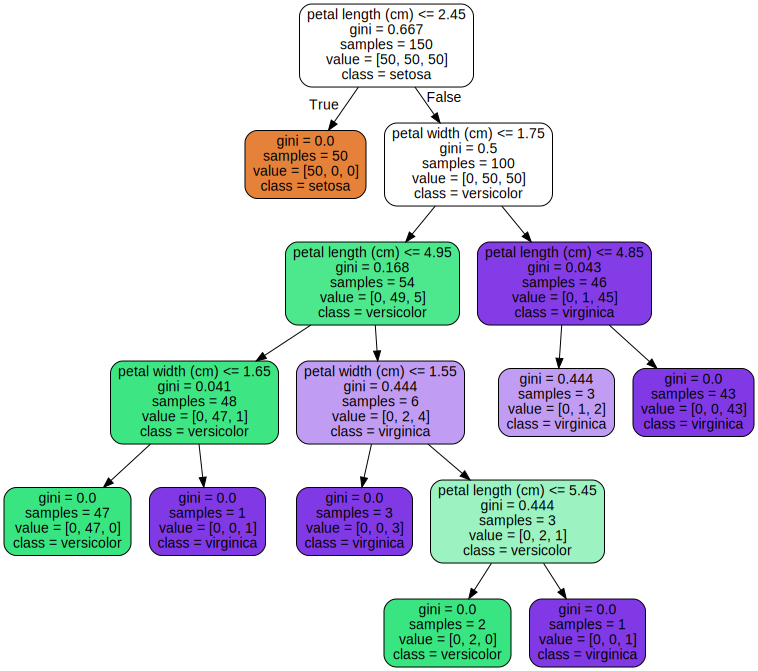

In [16]:
png_tree

overFitting

***

## Tree

In [29]:
reg_tree = tree.DecisionTreeRegressor(random_state=42)

In [30]:
reg_tree.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

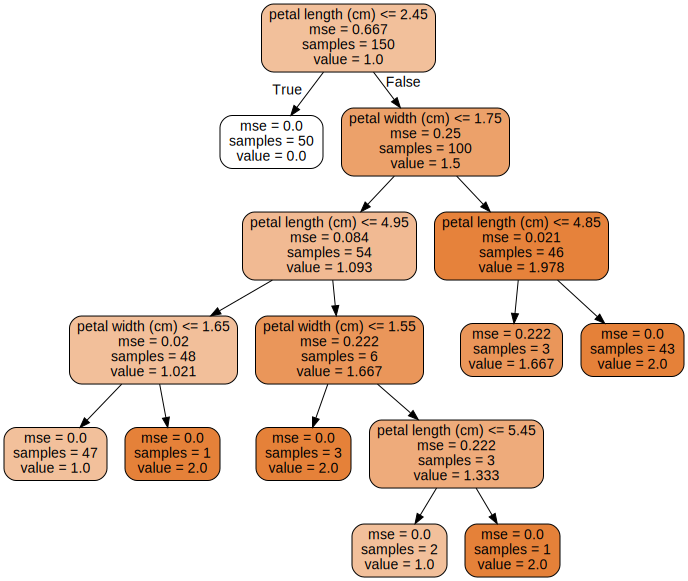

In [32]:
dot_data = tree.export_graphviz(reg_tree,out_file=None,feature_names=iris.feature_names[2:],class_names=iris.target_names,rounded=True,filled=True)
png_reg = graphviz.Source(dot_data)
png_reg